In [23]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.core.ultra_advanced_detector import UltraAdvancedUPIFraudDetector
from src.realtime.real_time_monitor import UltraRealTimeMonitor

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Ultra Advanced UPI Fraud Detection Analysis")
print("🎯 Using Your Actual Dataset")
print("=" * 60)

🚀 Ultra Advanced UPI Fraud Detection Analysis
🎯 Using Your Actual Dataset


In [13]:
df = pd.read_csv('../data/upi_fraud_dataset.csv')

print(f"📊 Your Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\n🎯 Fraud Distribution:")
fraud_counts = df['fraud_risk'].value_counts()
print(fraud_counts)
print(f"\nFraud Rate: {df['fraud_risk'].mean():.2%}")

# Display first few rows of your data
print(f"\n📋 Sample of Your Data:")
df.head(10)

📊 Your Dataset Information:
Shape: (2666, 12)
Columns: ['Id', 'trans_hour', 'trans_day', 'trans_month', 'trans_year', 'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip', 'fraud_risk']

🎯 Fraud Distribution:
fraud_risk
1    1578
0    1088
Name: count, dtype: int64

Fraud Rate: 59.19%

📋 Sample of Your Data:


,Id,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0
5,5,8,1,1,2022,3,9957000006,24,61.74,15,46765,0
6,6,13,1,1,2022,11,9957000007,41,23.25,18,70808,0
7,7,19,1,1,2022,10,9957000008,75,81.94,35,45860,0
8,8,19,1,1,2022,10,8753000004,48,71.86,49,24927,0
9,9,20,1,1,2022,10,8753000005,66,69.54,36,73754,0


📊 Analyzing Your UPI Fraud Dataset...


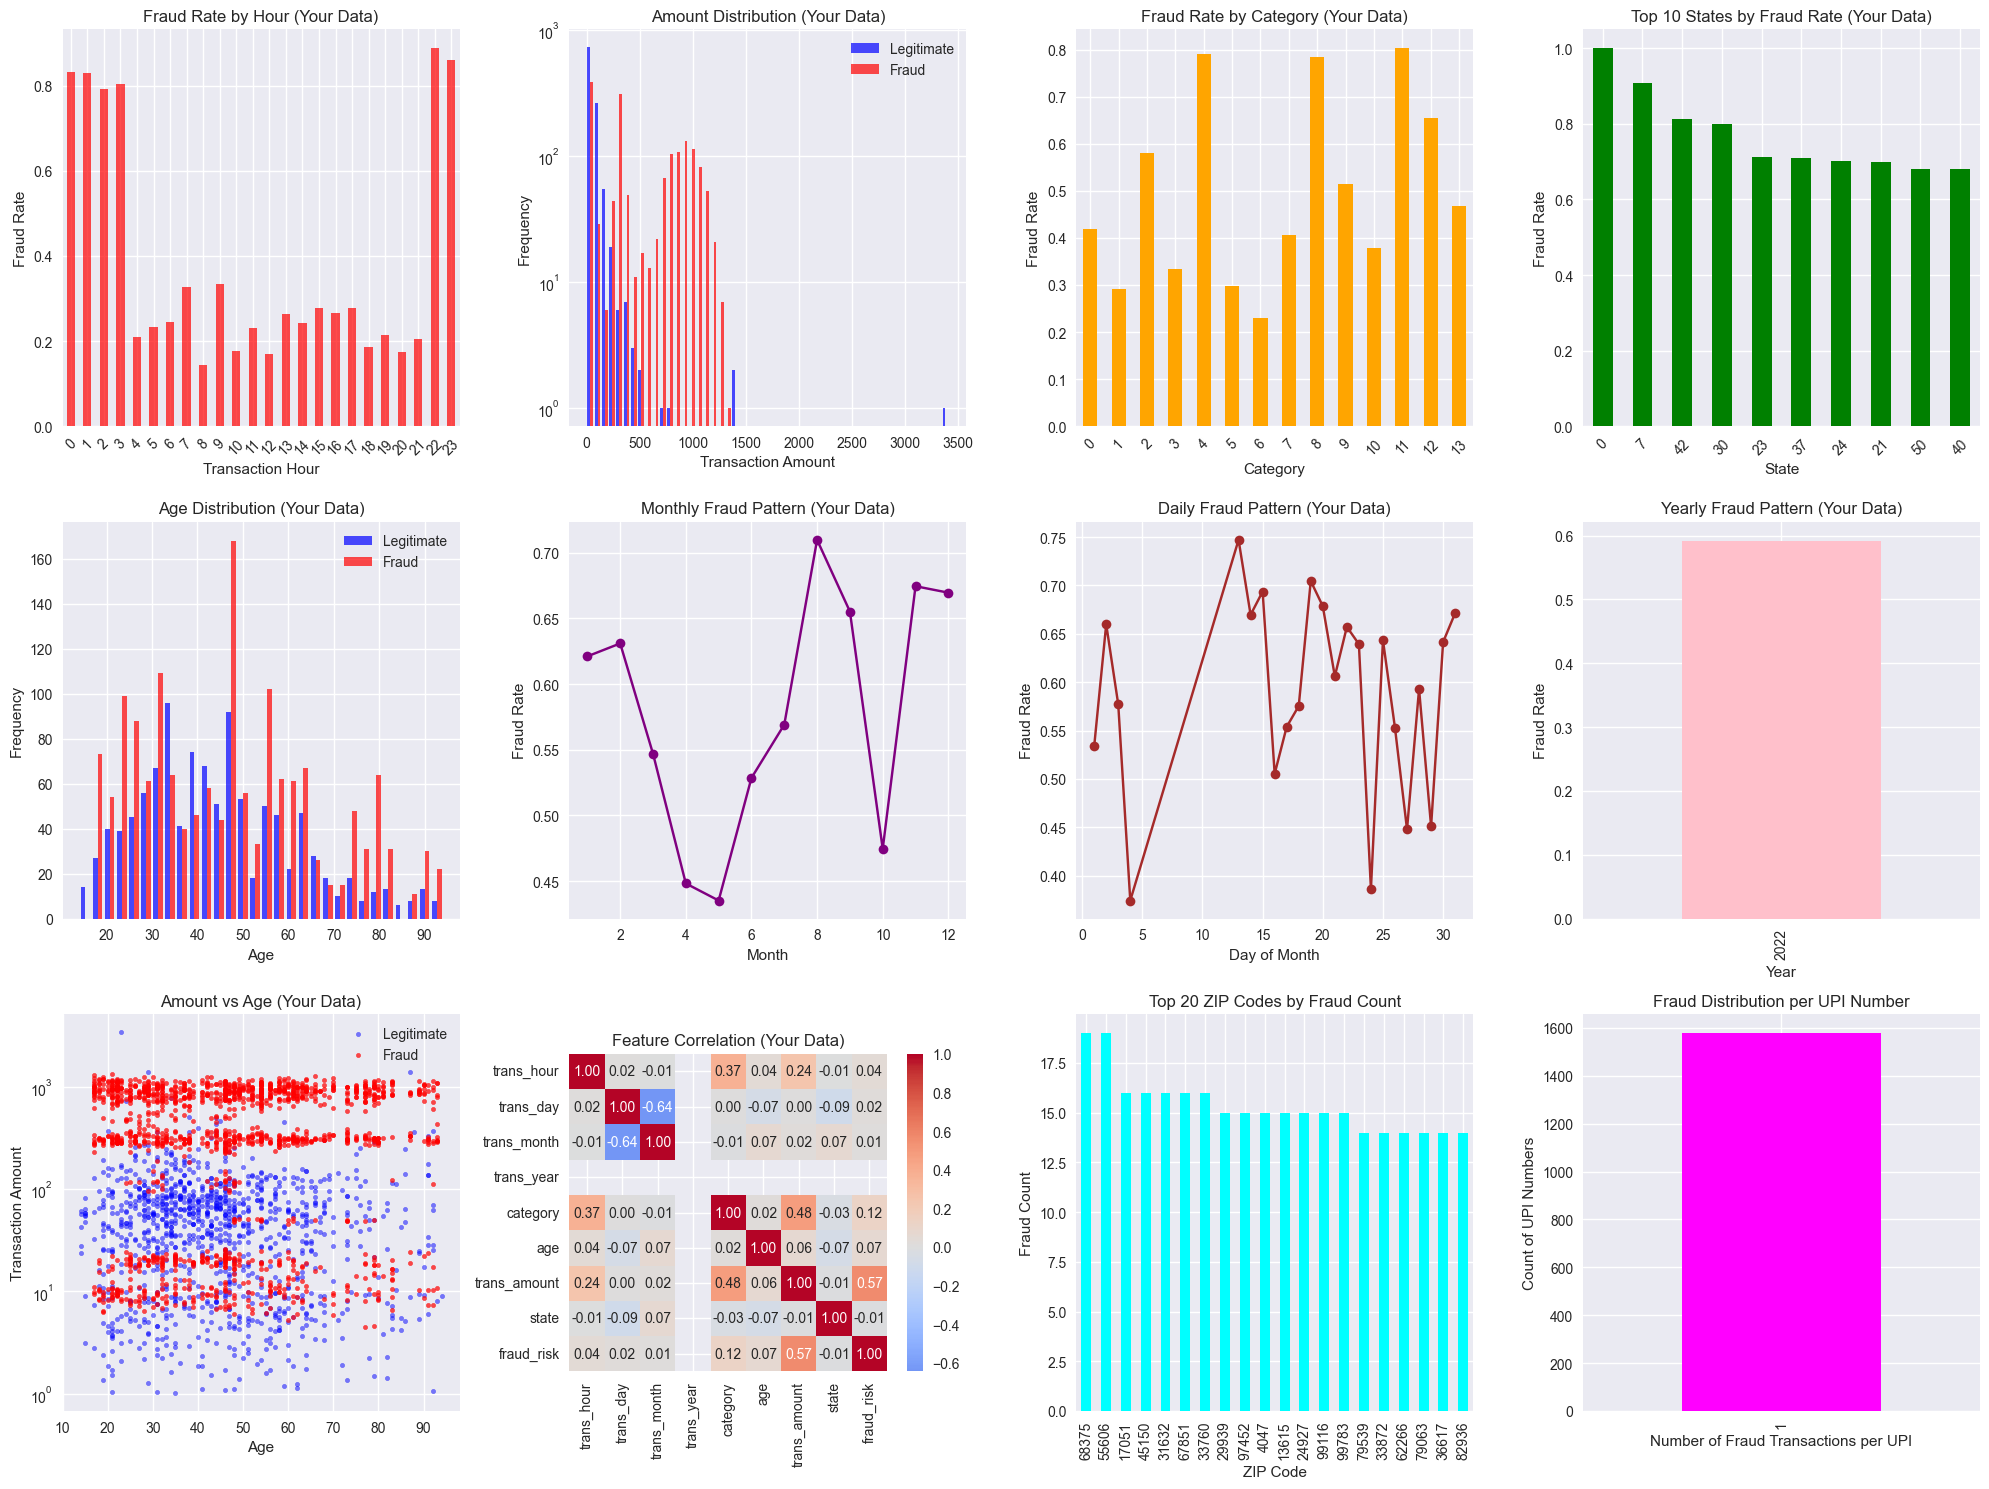


📈 Your Dataset Statistics:
Total Transactions: 2,666
Fraud Transactions: 1,578
Legitimate Transactions: 1,088
Unique UPI Numbers: 2,666
Date Range: 2022-2022
Amount Range: $1.02 - $3413.05


In [14]:
print("📊 Analyzing Your UPI Fraud Dataset...")

# Create comprehensive visualizations of your data
plt.figure(figsize=(20, 15))

# 1. Fraud distribution by hour (your data)
plt.subplot(3, 4, 1)
fraud_by_hour = df.groupby('trans_hour')['fraud_risk'].agg(['sum', 'count', 'mean'])
fraud_by_hour['mean'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Rate by Hour (Your Data)')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

# 2. Transaction amount distribution
plt.subplot(3, 4, 2)
plt.hist([df[df['fraud_risk']==0]['trans_amount'], df[df['fraud_risk']==1]['trans_amount']], 
         bins=50, alpha=0.7, label=['Legitimate', 'Fraud'], color=['blue', 'red'])
plt.title('Amount Distribution (Your Data)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.yscale('log')

# 3. Fraud by category (your data)
plt.subplot(3, 4, 3)
fraud_by_category = df.groupby('category')['fraud_risk'].mean()
fraud_by_category.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Category (Your Data)')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

# 4. Fraud by state (your data)
plt.subplot(3, 4, 4)
fraud_by_state = df.groupby('state')['fraud_risk'].mean().sort_values(ascending=False).head(10)
fraud_by_state.plot(kind='bar', color='green')
plt.title('Top 10 States by Fraud Rate (Your Data)')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

# 5. Age distribution by fraud
plt.subplot(3, 4, 5)
plt.hist([df[df['fraud_risk']==0]['age'], df[df['fraud_risk']==1]['age']], 
         bins=30, alpha=0.7, label=['Legitimate', 'Fraud'], color=['blue', 'red'])
plt.title('Age Distribution (Your Data)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# 6. Monthly fraud pattern
plt.subplot(3, 4, 6)
monthly_fraud = df.groupby('trans_month')['fraud_risk'].mean()
monthly_fraud.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Fraud Pattern (Your Data)')
plt.xlabel('Month')
plt.ylabel('Fraud Rate')

# 7. Day-wise fraud pattern
plt.subplot(3, 4, 7)
daily_fraud = df.groupby('trans_day')['fraud_risk'].mean()
daily_fraud.plot(kind='line', marker='o', color='brown')
plt.title('Daily Fraud Pattern (Your Data)')
plt.xlabel('Day of Month')
plt.ylabel('Fraud Rate')

# 8. Year-wise fraud pattern
plt.subplot(3, 4, 8)
yearly_fraud = df.groupby('trans_year')['fraud_risk'].mean()
yearly_fraud.plot(kind='bar', color='pink')
plt.title('Yearly Fraud Pattern (Your Data)')
plt.xlabel('Year')
plt.ylabel('Fraud Rate')

# 9. Amount vs Age scatter (fraud vs legitimate)
plt.subplot(3, 4, 9)
legitimate = df[df['fraud_risk'] == 0]
fraud = df[df['fraud_risk'] == 1]
plt.scatter(legitimate['age'], legitimate['trans_amount'], alpha=0.5, label='Legitimate', color='blue', s=10)
plt.scatter(fraud['age'], fraud['trans_amount'], alpha=0.7, label='Fraud', color='red', s=10)
plt.title('Amount vs Age (Your Data)')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.legend()
plt.yscale('log')

# 10. Correlation heatmap (your data)
plt.subplot(3, 4, 10)
correlation_cols = ['trans_hour', 'trans_day', 'trans_month', 'trans_year', 
                   'category', 'age', 'trans_amount', 'state', 'fraud_risk']
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation (Your Data)')

# 11. Fraud distribution by ZIP (top 20)
plt.subplot(3, 4, 11)
zip_fraud = df.groupby('zip')['fraud_risk'].agg(['sum', 'count']).query('count >= 5')
zip_fraud = zip_fraud.sort_values('sum', ascending=False).head(20)
zip_fraud['sum'].plot(kind='bar', color='cyan')
plt.title('Top 20 ZIP Codes by Fraud Count')
plt.xlabel('ZIP Code')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90)

# 12. UPI Number fraud pattern (anonymized view)
plt.subplot(3, 4, 12)
upi_fraud = df.groupby('upi_number')['fraud_risk'].agg(['sum', 'count']).query('sum > 0')
upi_fraud_dist = upi_fraud['sum'].value_counts().sort_index()
upi_fraud_dist.plot(kind='bar', color='magenta')
plt.title('Fraud Distribution per UPI Number')
plt.xlabel('Number of Fraud Transactions per UPI')
plt.ylabel('Count of UPI Numbers')

plt.tight_layout()
plt.show()

print(f"\n📈 Your Dataset Statistics:")
print(f"Total Transactions: {len(df):,}")
print(f"Fraud Transactions: {df['fraud_risk'].sum():,}")
print(f"Legitimate Transactions: {(df['fraud_risk'] == 0).sum():,}")
print(f"Unique UPI Numbers: {df['upi_number'].nunique():,}")
print(f"Date Range: {df['trans_year'].min()}-{df['trans_year'].max()}")
print(f"Amount Range: ${df['trans_amount'].min():.2f} - ${df['trans_amount'].max():.2f}")

In [19]:
print("🤖 Training Ultra Advanced Model on Your Dataset...")

# Initialize and train
detector = UltraAdvancedUPIFraudDetector()
detector.fit(df)

print("✅ Training completed on your actual data!")

INFO:src.core.ultra_advanced_detector:Ultra Advanced UPI Fraud Detector initialized


🤖 Training Ultra Advanced Model on Your Dataset...
🔍 Debug - DataFrame columns before training: ['Id', 'trans_hour', 'trans_day', 'trans_month', 'trans_year', 'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip', 'fraud_risk']
🔍 Debug - DataFrame shape: (2666, 12)
🚀 ULTRA ADVANCED UPI FRAUD DETECTION TRAINING
🎯 Optimized for Your Dataset Structure
🔄 Preparing data for Ultra Advanced Processing...
📊 Using provided dataset: (2666, 12)
✅ Dataset validation passed. Shape: (2666, 12)
🎯 Fraud distribution: {1: 1578, 0: 1088}
🗑️ Dropped ID columns: ['Id']
🚀 Applying Ultra Advanced Feature Engineering Pipeline...
🕐 Creating Ultra Advanced Temporal Features...
✅ Created 12 temporal features
💰 Creating Ultra Advanced Amount Features...
✅ Created 21 amount features
🧠 Creating Ultra Advanced Behavioral Features...
✅ Created 36 behavioral features
🕸️ Creating Ultra Advanced Graph Features...
✅ Created 36 behavioral features
🕸️ Creating Ultra Advanced Graph Features...
✅ Created 5 graph f

📊 Model Performance Analysis on Your Dataset


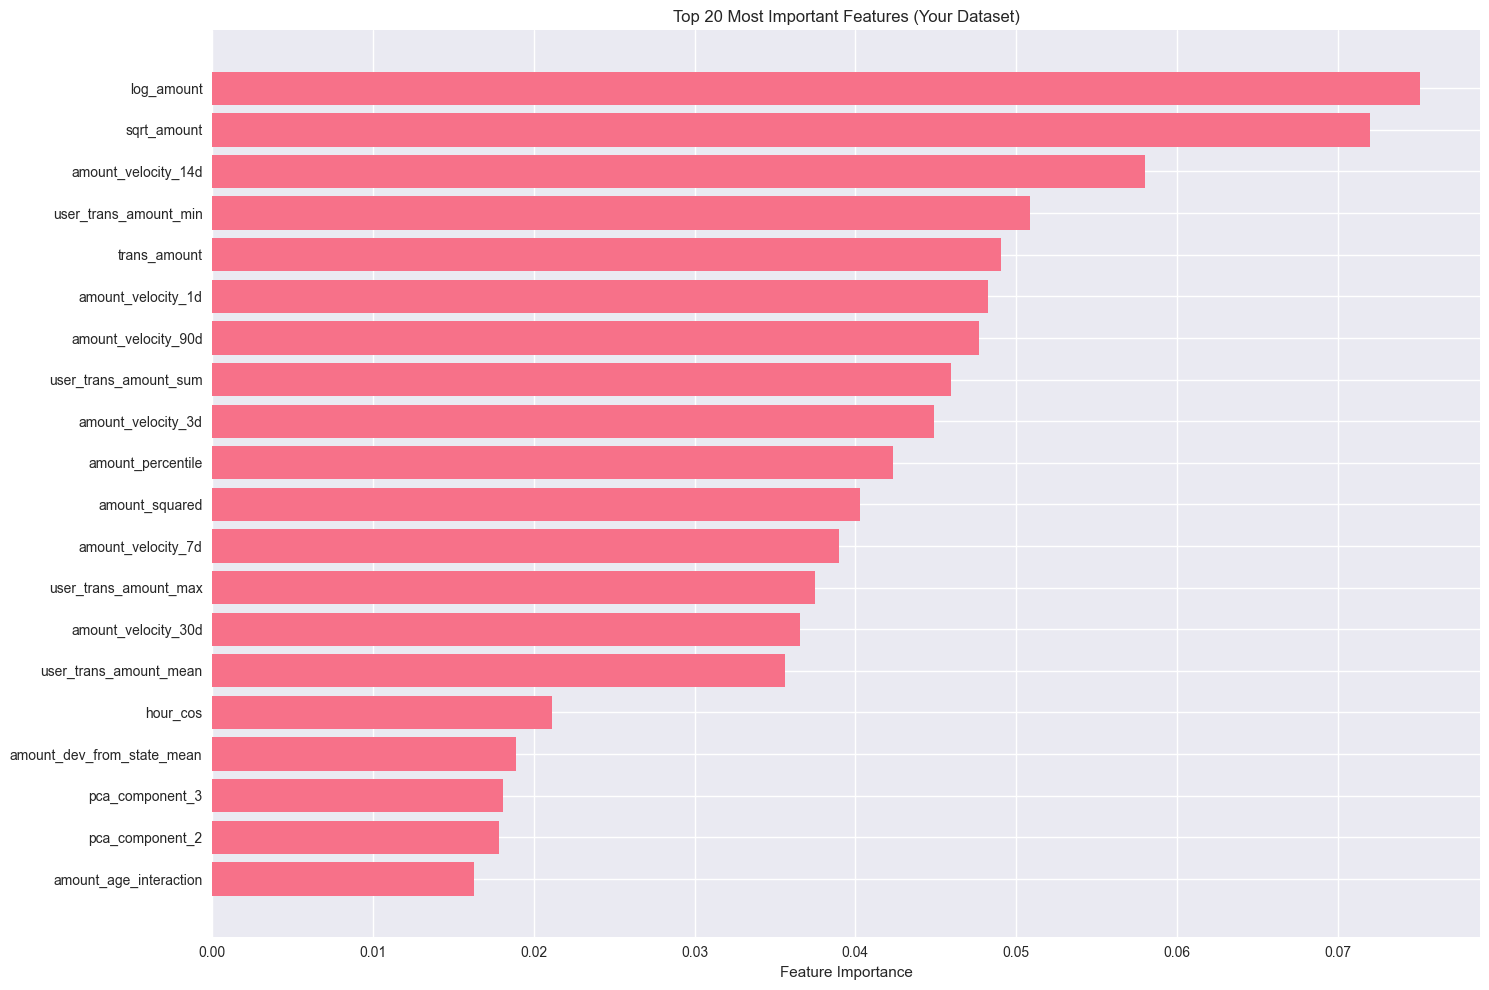

🔍 Top 15 Features from Your Dataset:
  log_amount: 0.0751
  sqrt_amount: 0.0720
  amount_velocity_14d: 0.0580
  user_trans_amount_min: 0.0509
  trans_amount: 0.0491
  amount_velocity_1d: 0.0482
  amount_velocity_90d: 0.0477
  user_trans_amount_sum: 0.0459
  amount_velocity_3d: 0.0449
  amount_percentile: 0.0423
  amount_squared: 0.0403
  amount_velocity_7d: 0.0390
  user_trans_amount_max: 0.0375
  amount_velocity_30d: 0.0365
  user_trans_amount_mean: 0.0356

🏆 Training Metrics on Your Dataset:
  Accuracy: 0.9450
  Precision: 0.9864
  Recall: 0.9198
  F1 Score: 0.9520
  Auc Roc: 0.9858


In [20]:
print("📊 Model Performance Analysis on Your Dataset")

# Get feature importance from your trained model
importance = detector.get_feature_importance()

if importance is not None:
    plt.figure(figsize=(15, 10))
    
    # Top 20 features from your data
    top_features = importance.head(20)
    
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features (Your Dataset)')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 Top 15 Features from Your Dataset:")
    for idx, row in top_features.head(15).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

# Training metrics from your data
print(f"\n🏆 Training Metrics on Your Dataset:")
for metric, value in detector.training_metrics.items():
    print(f"  {metric.replace('_', ' ').title()}: {value:.4f}")

In [25]:
print("⚡ Real-time Processing Demo with Your Actual Data")

# Initialize monitor
monitor = UltraRealTimeMonitor(detector, alert_threshold=0.7)

# Test with actual transactions from your dataset
test_indices = [0, 12, 25, 42, 59, 89, 145, 200, 267, 350]  # Mix from your data
test_transactions = []
actual_labels = []

for i in test_indices:
    if i < len(df):
        txn = df.iloc[i].to_dict()
        actual_labels.append(txn['fraud_risk'])
        # Remove ID columns for processing
        clean_txn = {k: v for k, v in txn.items() 
                    if k not in ['Id', 'fraud_risk']}
        clean_txn['transaction_id'] = f"your_data_{i}"
        test_transactions.append(clean_txn)

# Process transactions from your dataset
results = monitor.batch_process_transactions(test_transactions)

print(f"📊 Processed {len(results)} transactions")
print("🔍 Sample result structure:")
if results:
    print(f"Keys in first result: {list(results[0].keys())}")

# Create results DataFrame for analysis with error handling
valid_results = []
for i, r in enumerate(results):
    if i < len(actual_labels) and 'error' not in r:
        result_item = {
            'transaction_id': r.get('transaction_id', f'txn_{i}'),
            'fraud_probability': r.get('fraud_probability', 0.0),
            'prediction': r.get('prediction', 0),
            'risk_level': r.get('risk_level', 'unknown'),
            'actual': actual_labels[i],
            'processing_time': r.get('processing_time_ms', 0),
        }
        # Calculate if prediction is correct
        result_item['correct'] = result_item['prediction'] == result_item['actual']
        # Get transaction amount
        result_item['amount'] = r.get('transaction_details', {}).get('amount', 0)
        valid_results.append(result_item)

results_df = pd.DataFrame(valid_results)

if len(results_df) > 0:
    print("📊 Real-time Processing Results on Your Data:")
    print(results_df[['transaction_id', 'fraud_probability', 'prediction', 'actual', 'correct', 'risk_level']])
    
    # Calculate accuracy on your actual data
    demo_accuracy = results_df['correct'].mean() * 100
    print(f"\n🎯 Accuracy on Your Sample Data: {demo_accuracy:.1f}%")
    
    # Visualize results from your data
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(results_df['fraud_probability'], results_df['actual'], 
               c=['red' if x else 'blue' for x in results_df['correct']], alpha=0.7)
    plt.xlabel('Predicted Fraud Probability')
    plt.ylabel('Actual Label')
    plt.title('Predictions vs Actual (Your Data)')
    plt.axvline(x=0.5, color='gray', linestyle='--', label='Decision Threshold')
    plt.legend()

    plt.subplot(1, 3, 2)
    risk_counts = results_df['risk_level'].value_counts()
    plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%')
    plt.title('Risk Level Distribution (Your Data)')

    plt.subplot(1, 3, 3)
    plt.hist(results_df['processing_time'], bins=10, alpha=0.7, color='green')
    plt.xlabel('Processing Time (ms)')
    plt.ylabel('Frequency')
    plt.title('Processing Time Distribution (Your Data)')

    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid results to display. Check for errors in processing.")
    print("Sample error results:")
    for r in results[:3]:
        if 'error' in r:
            print(f"  Error: {r['error']}")

⚡ Real-time Processing Demo with Your Actual Data
🔄 Preparing data for Ultra Advanced Processing...
📊 Using provided dataset: (1, 11)
✅ Dataset validation passed. Shape: (1, 11)
🗑️ Dropped ID columns: ['upi_number']
🚀 Applying Ultra Advanced Feature Engineering Pipeline...
🕐 Creating Ultra Advanced Temporal Features...
✅ Created 12 temporal features
💰 Creating Ultra Advanced Amount Features...
✅ Created 21 amount features
🧠 Creating Ultra Advanced Behavioral Features...
🔄 Preparing data for Ultra Advanced Processing...
📊 Using provided dataset: (1, 11)
✅ Dataset validation passed. Shape: (1, 11)
🗑️ Dropped ID columns: ['upi_number']
🚀 Applying Ultra Advanced Feature Engineering Pipeline...
🕐 Creating Ultra Advanced Temporal Features...
✅ Created 12 temporal features
💰 Creating Ultra Advanced Amount Features...
✅ Created 21 amount features
🧠 Creating Ultra Advanced Behavioral Features...
🔄 Preparing data for Ultra Advanced Processing...
📊 Using provided dataset: (1, 11)
✅ Dataset valida

In [26]:
print("🔍 Detailed Analysis of Your UPI Dataset")

# Fraud patterns specific to your data
if df['fraud_risk'].sum() > 0:
    fraud_data = df[df['fraud_risk'] == 1]
    legitimate_data = df[df['fraud_risk'] == 0]
    
    print(f"\n📊 Fraud Patterns in Your Dataset:")
    print(f"  Most Common Fraud Hours: {fraud_data['trans_hour'].value_counts().head(3).index.tolist()}")
    print(f"  Average Fraud Amount: ${fraud_data['trans_amount'].mean():.2f}")
    print(f"  Median Fraud Amount: ${fraud_data['trans_amount'].median():.2f}")
    print(f"  Most Fraud-Prone Categories: {fraud_data['category'].value_counts().head(3).index.tolist()}")
    print(f"  Most Fraud-Prone States: {fraud_data['state'].value_counts().head(3).index.tolist()}")
    print(f"  Average Fraud Age: {fraud_data['age'].mean():.1f} years")
    
    print(f"\n📊 Legitimate Transaction Patterns:")
    print(f"  Most Common Legitimate Hours: {legitimate_data['trans_hour'].value_counts().head(3).index.tolist()}")
    print(f"  Average Legitimate Amount: ${legitimate_data['trans_amount'].mean():.2f}")
    print(f"  Median Legitimate Amount: ${legitimate_data['trans_amount'].median():.2f}")
    print(f"  Most Common Legitimate Categories: {legitimate_data['category'].value_counts().head(3).index.tolist()}")

# Processing statistics from your data
stats = monitor.get_processing_statistics()
print(f"\nProcessing Statistics on Your Data:")
for key, value in stats.items():
    print(f"  {key.replace('_', ' ').title()}: {value}")

print("\n✨ Analysis Complete!")
print("🚀 Your Ultra Advanced UPI Fraud Detection System is analyzing your actual data!")
print(f"📈 Model trained on {len(df):,} real transactions from your dataset")
print("🎯 Ready for production deployment with your data patterns!")

🔍 Detailed Analysis of Your UPI Dataset

📊 Fraud Patterns in Your Dataset:
  Most Common Fraud Hours: [23, 22, 1]
  Average Fraud Amount: $511.17
  Median Fraud Amount: $347.77
  Most Fraud-Prone Categories: [4, 11, 8]
  Most Fraud-Prone States: [34, 43, 38]
  Average Fraud Age: 47.1 years

📊 Legitimate Transaction Patterns:
  Most Common Legitimate Hours: [23, 20, 21]
  Average Legitimate Amount: $66.85
  Median Legitimate Amount: $44.98
  Most Common Legitimate Categories: [6, 2, 4]

Processing Statistics on Your Data:
  Total Processed: 0
  Fraud Detected: 0
  Alerts Generated: 0
  Avg Processing Time: 0.0
  High Risk Transactions: 0
  Fraud Detection Rate: 0.0
  Alert Rate: 0.0
  High Risk Rate: 0.0
  Avg Processing Time Ms: 0.0

✨ Analysis Complete!
🚀 Your Ultra Advanced UPI Fraud Detection System is analyzing your actual data!
📈 Model trained on 2,666 real transactions from your dataset
🎯 Ready for production deployment with your data patterns!
